In [1]:
#Data Loading and Preparation
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import plotly.express as px
import numpy as np  

In [2]:
aqi_files = ['aqidaily2015.csv',
            'aqidaily2016.csv', 
            'aqidaily2017.csv',             
             'aqidaily2018.csv', 
             'aqidaily2019.csv',
             'aqidaily2020.csv']
aqi_all_files = [
    'aqidailyall2015.csv',
    'aqidailyall2016.csv',
    'aqidailyall2017.csv',
    'aqidailyall2018.csv',
    'aqidailyall2019.csv',
    'aqidailyall2020.csv',
]


## Data Cleaning

In [3]:
# concat all the dataset in one data frame of AQI data
aqi_data = pd.concat([pd.read_csv(f) for f in aqi_all_files], ignore_index=True)
hospitalize_data = pd.read_csv('asthma-hospitalization-rates-by-county-2015_2020.csv', encoding='ISO-8859-1')

In [4]:
# Convert into appropriate datatype
aqi_data['Date'] = pd.to_datetime(aqi_data['Date'])

In [5]:
# create a year column
aqi_data['Year'] = aqi_data['Date'].dt.year
aqi_data

,Date,Overall AQI Value,Main Pollutant,Site Name (of Overall AQI),Site ID (of Overall AQI),Source (of Overall AQI),CO,Ozone,PM10,PM25,NO2,Year
0,2015-01-01,156,PM2.5,Reseda,06-037-1201,AQS,28,35,23,156,38,2015
1,2015-01-02,105,PM2.5,Reseda,06-037-1201,AQS,20,35,21,105,40,2015
2,2015-01-03,106,PM2.5,Reseda,06-037-1201,AQS,23,37,28,106,42,2015
3,2015-01-04,107,PM2.5,Long Beach (South),06-037-4004,AQS,25,40,26,107,45,2015
4,2015-01-05,57,PM2.5,Long Beach (South),06-037-4004,AQS,15,37,23,57,51,2015
...,...,...,...,...,...,...,...,...,...,...,...,...
2187,2020-12-27,67,PM2.5,Los Angeles-North Main Street,06-037-1103,AQS,10,36,21,67,25,2020
2188,2020-12-28,51,PM2.5,Compton,06-037-1302,AQS,6,34,8,51,41,2020
2189,2020-12-29,64,PM2.5,Compton,06-037-1302,AQS,20,39,17,64,51,2020
2190,2020-12-30,76,PM2.5,Compton,06-037-1302,AQS,25,42,18,76,57,2020


In [6]:
#drop unnecessary column 
hospitalize_data.drop('COMMENT', axis=1, inplace=True)

In [98]:
# drop rows with null vaule
hospitalize_data.dropna(inplace =True)
hospitalize_data.drop(hospitalize_data[hospitalize_data['AGE GROUP'] == 'Los Angeles'].index, inplace=True)

In [8]:
# Convert into appropriate datatype
hospitalize_data['NUMBER OF HOSPITALIZATIONS'] = hospitalize_data['NUMBER OF HOSPITALIZATIONS'].str.replace(',', '').astype('int')

In [9]:
hospitalize_data = hospitalize_data[hospitalize_data['COUNTY'] == 'Los Angeles']

## Data Exploration

In [27]:
# all dataframe
aqi_data['Year'] = aqi_data['Date'].dt.year
merged_df = pd.merge(aqi_data, hospitalize_data, left_on='Year', right_on='YEAR')
merged_df

,Date,Overall AQI Value,Main Pollutant,Site Name (of Overall AQI),Site ID (of Overall AQI),Source (of Overall AQI),CO,Ozone,PM10,PM25,NO2,Year,COUNTY,YEAR,STRATA,STRATA NAME,AGE GROUP,NUMBER OF HOSPITALIZATIONS,AGE-ADJUSTED HOSPITALIZATION RATE
0,2015-01-01,156,PM2.5,Reseda,06-037-1201,AQS,28,35,23,156,38,2015,Los Angeles,2015,Total population,All ages,All ages,8544,8.5
1,2015-01-01,156,PM2.5,Reseda,06-037-1201,AQS,28,35,23,156,38,2015,Los Angeles,2015,Child vs. adult,017 years,017 years,2639,11.1
2,2015-01-01,156,PM2.5,Reseda,06-037-1201,AQS,28,35,23,156,38,2015,Los Angeles,2015,Child vs. adult,18+ years,18+ years,5905,7.6
3,2015-01-01,156,PM2.5,Reseda,06-037-1201,AQS,28,35,23,156,38,2015,Los Angeles,2015,Age groups,04 years,04 years,1276,18.7
4,2015-01-01,156,PM2.5,Reseda,06-037-1201,AQS,28,35,23,156,38,2015,Los Angeles,2015,Age groups,517 years,517 years,1363,8.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25934,2020-12-31,120,PM2.5,Compton,06-037-1302,AQS,28,37,14,120,54,2020,Los Angeles,2020,Race/ethnicity,Black,All ages,589,7.7
25935,2020-12-31,120,PM2.5,Compton,06-037-1302,AQS,28,37,14,120,54,2020,Los Angeles,2020,Race/ethnicity,Hispanic,All ages,1235,2.6
25936,2020-12-31,120,PM2.5,Compton,06-037-1302,AQS,28,37,14,120,54,2020,Los Angeles,2020,Race/ethnicity,Asian/PI,All ages,207,1.4
25937,2020-12-31,120,PM2.5,Compton,06-037-1302,AQS,28,37,14,120,54,2020,Los Angeles,2020,Race/ethnicity,NHPI,All ages,19,9.0


In [54]:
# 0-17 and 18+ dataframe all data
merged_age_all = merged_df[(merged_df['AGE GROUP'] == '017 years') | (merged_df['AGE GROUP'] == '18+ years')]


In [44]:
# 0-17 and 18+ dataframe mean
merged_age = merged_df[(merged_df['AGE GROUP'] == '017 years') | (merged_df['AGE GROUP'] == '18+ years')]
merged_age = merged_age.groupby('YEAR').mean(numeric_only = True)  
merged_age.drop('Year', axis = 1, inplace = True)
merged_age

,Overall AQI Value,CO,Ozone,PM25,NO2,NUMBER OF HOSPITALIZATIONS,AGE-ADJUSTED HOSPITALIZATION RATE
YEAR,,,,,,,
2015,91.287671,12.142466,77.846575,68.260274,41.849315,4272.0,9.35
2016,86.068306,12.049180,73.248634,67.868852,40.669399,2949.5,7.60
2017,91.323288,11.794521,78.273973,67.827397,42.471233,2712.0,7.05
2018,85.413699,10.339726,72.312329,67.073973,39.391781,2679.5,7.05
2019,81.923288,9.687671,71.452055,58.539726,39.463014,2713.0,6.90
2020,97.169399,10.442623,84.202186,67.841530,40.407104,1359.5,3.10


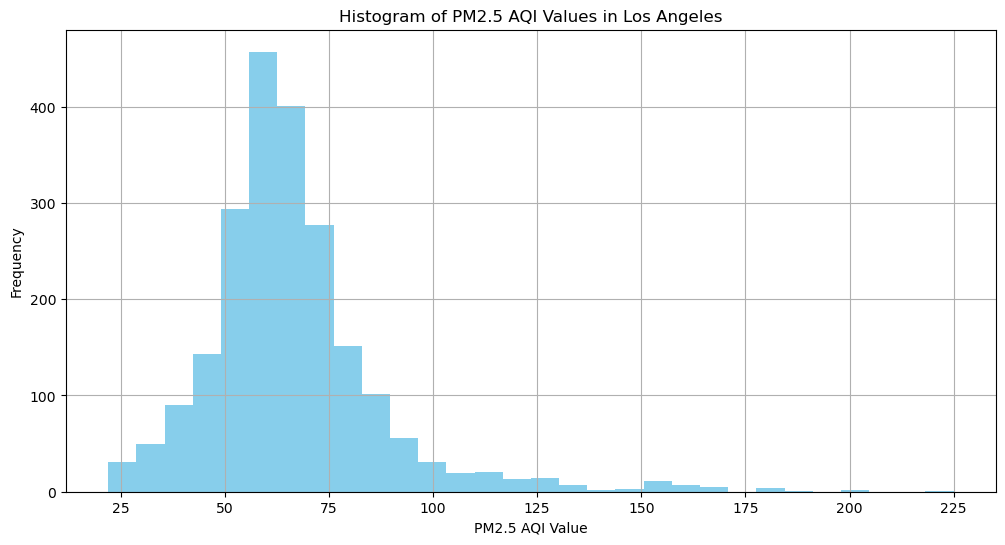

In [46]:
# Set up the figure size for the histogram
plt.figure(figsize=(12, 6))
# Create a histogram to visualize the distribution of PM2.5 AQI values
plt.hist(aqi_data['PM25'], bins=30, color='skyblue')
plt.title('Histogram of PM2.5 AQI Values in Los Angeles')
plt.xlabel('PM2.5 AQI Value')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


### The histogram likely showed a skewed distribution of AQI values, with a concentration of days falling within the 'Moderate' AQI range (according to EPA standards, 51-100).
### There might have been fewer occurrences of very high AQI values ('Unhealthy' categories), but these instances are critical when considering health impacts.
### Most days in Los Angeles maintain a moderate level of air quality, but spontaneous spikes into higher AQI values could represent significant health risks.


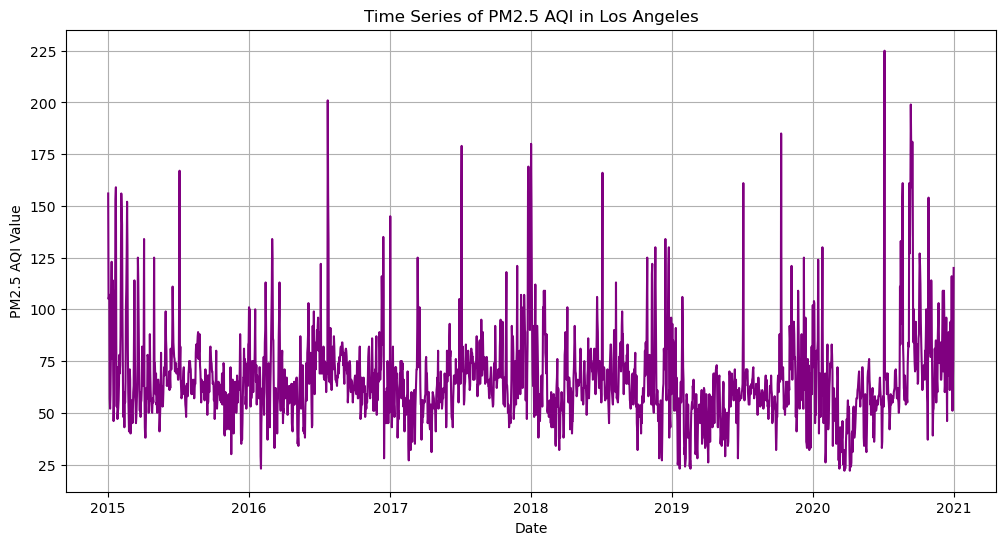

In [49]:
#Time series plot
plt.figure(figsize=(12, 6))
plt.plot(aqi_data['Date'], aqi_data['PM25'], color='purple')
plt.title('Time Series of PM2.5 AQI in Los Angeles')
plt.xlabel('Date')
plt.ylabel('PM2.5 AQI Value')
plt.grid(True)
plt.show()

### The time series plot would have highlighted any long-term trends in air quality, such as improvements or deteriorations.Seasonal patterns 
### might also have been evident, with potential spikes in AQI during specific times of the year (e.g., summer due to wildfires).AQI levels 
### in Los Angeles might show seasonal variations and specific periods of elevated pollution which correspond to external environmental factors.

In [100]:
hospitalize_age_data = hospitalize_data.groupby('AGE GROUP').mean(numeric_only = True)
hospitalize_age_data.drop('YEAR', axis =1)


,NUMBER OF HOSPITALIZATIONS,AGE-ADJUSTED HOSPITALIZATION RATE
AGE GROUP,,
017 years,2186.333333,9.466667
04 years,1039.166667,16.483333
18+ years,3375.500000,4.216667
1864 years,2303.000000,3.450000
517 years,1147.166667,6.900000
65+ years,1072.500000,7.966667
All ages,1831.529412,6.820588


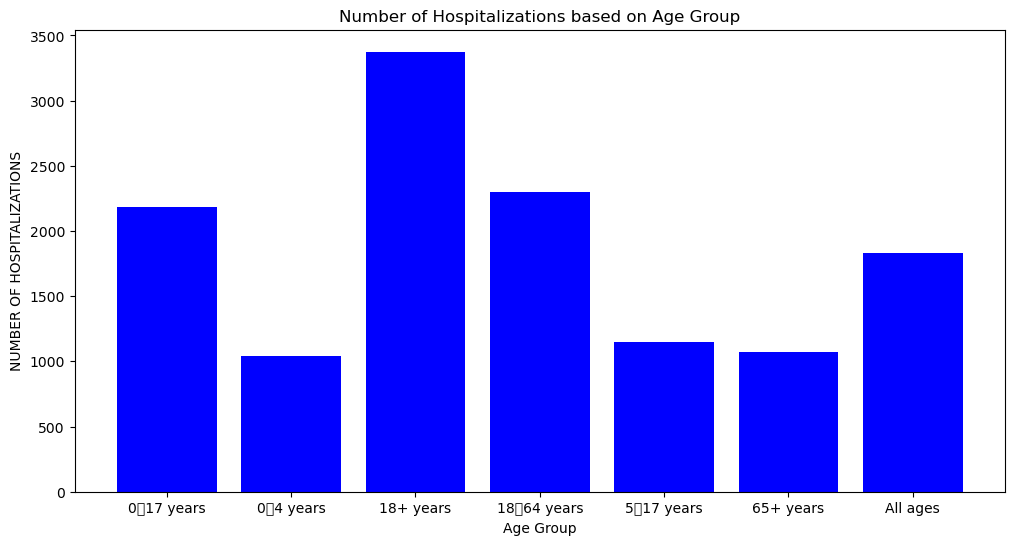

In [105]:
fig, ax1 = plt.subplots(1, figsize=(12, 6))

# Plotting the first bar chart for PM2.5
ax1.bar(hospitalize_age_data.index, hospitalize_age_data['NUMBER OF HOSPITALIZATIONS'], color='b')
ax1.set_xlabel('Age Group')
ax1.set_ylabel('NUMBER OF HOSPITALIZATIONS')
ax1.set_title('Number of Hospitalizations based on Age Group')



# Show the plot
plt.show()

In [68]:
merged_age

,Overall AQI Value,CO,Ozone,PM25,NO2,NUMBER OF HOSPITALIZATIONS,AGE-ADJUSTED HOSPITALIZATION RATE
YEAR,,,,,,,
2015,91.287671,12.142466,77.846575,68.260274,41.849315,4272.0,9.35
2016,86.068306,12.049180,73.248634,67.868852,40.669399,2949.5,7.60
2017,91.323288,11.794521,78.273973,67.827397,42.471233,2712.0,7.05
2018,85.413699,10.339726,72.312329,67.073973,39.391781,2679.5,7.05
2019,81.923288,9.687671,71.452055,58.539726,39.463014,2713.0,6.90
2020,97.169399,10.442623,84.202186,67.841530,40.407104,1359.5,3.10


# Hypothesis Testing

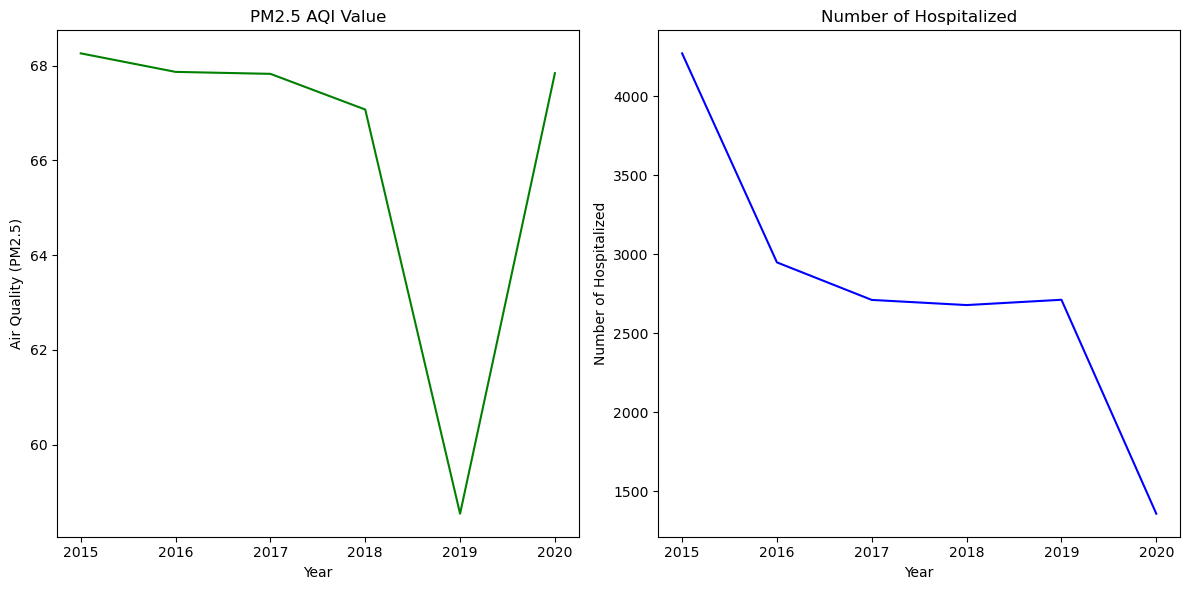

In [108]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Plotting the first bar chart for PM2.5
ax1.plot(merged_age.index, merged_age['PM25'], color='g')
ax1.set_xlabel('Year')
ax1.set_ylabel('Air Quality (PM2.5)')
ax1.set_title('PM2.5 AQI Value')

# Plotting the second bar chart for hospitalized rate
ax2.plot(merged_age.index, merged_age['NUMBER OF HOSPITALIZATIONS'], color='b')
ax2.set_xlabel('Year')
ax2.set_ylabel('Number of Hospitalized')
ax2.set_title('Number of Hospitalized')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

Text(0.5, 1.0, 'Scatter Plot of PM2.5 vs Age-Adjusted Hospitalization Rate')

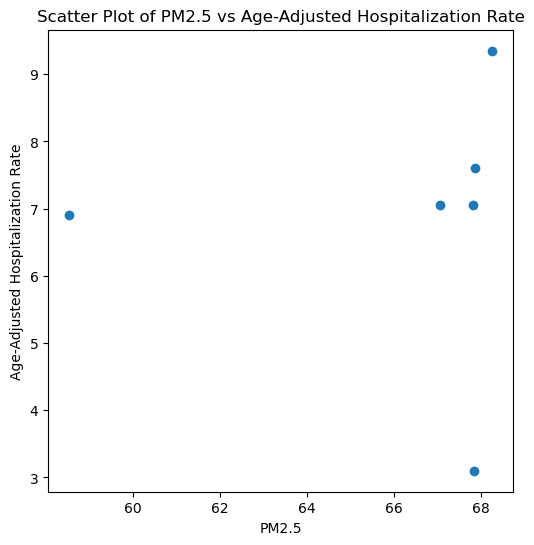

In [70]:
plt.figure(figsize=(6, 6))
plt.scatter( merged_age['PM25'],merged_age['AGE-ADJUSTED HOSPITALIZATION RATE'])
plt.xlabel('PM2.5')
plt.ylabel('Age-Adjusted Hospitalization Rate')
plt.title('Scatter Plot of PM2.5 vs Age-Adjusted Hospitalization Rate')

In [106]:
heatmap_data = merged_age[['CO','Ozone','PM25','NO2','NUMBER OF HOSPITALIZATIONS']]
heatmap_data.corr()

,CO,Ozone,PM25,NO2,NUMBER OF HOSPITALIZATIONS
CO,1.000000,0.187790,0.703393,0.817331,0.572444
Ozone,0.187790,1.000000,0.522164,0.471975,-0.393933
PM25,0.703393,0.522164,1.000000,0.551861,0.076304
NO2,0.817331,0.471975,0.551861,1.000000,0.383953
NUMBER OF HOSPITALIZATIONS,0.572444,-0.393933,0.076304,0.383953,1.000000


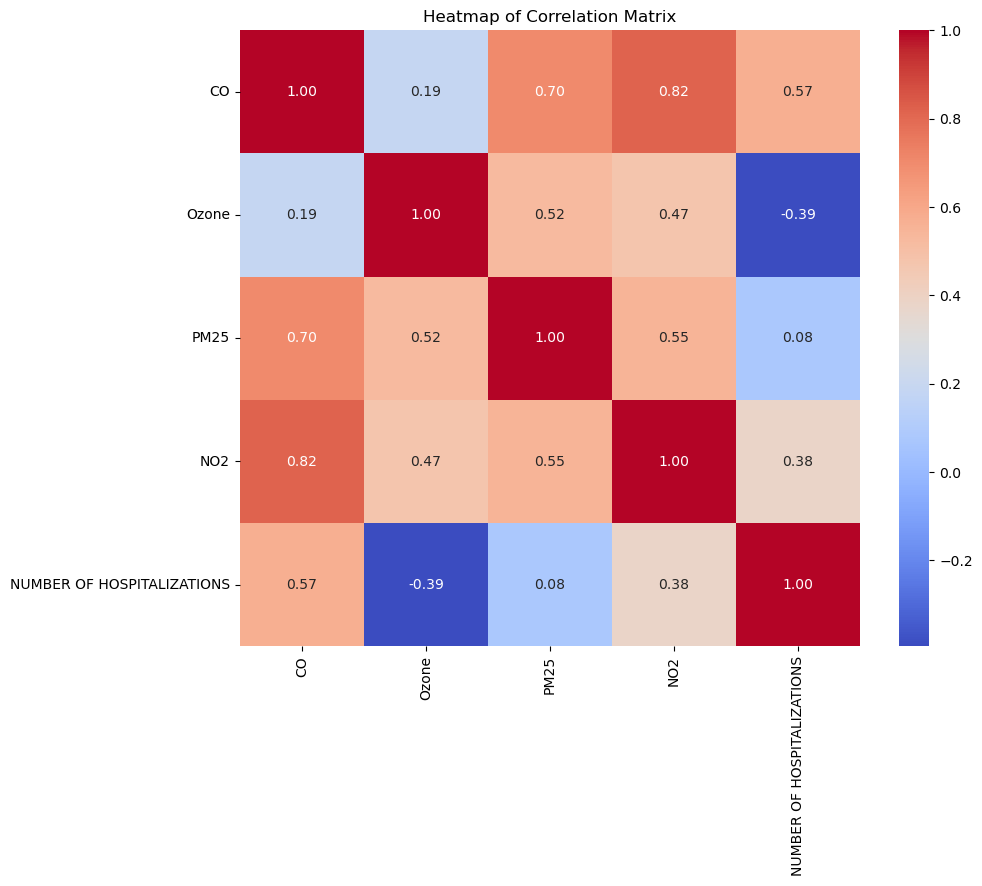

<Figure size 640x480 with 0 Axes>

In [107]:

plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap of Correlation Matrix')
plt.show()
plt.savefig('junk.pdf', dpi=200, bbox_inches='tight')